<a href="https://colab.research.google.com/github/antoniogss/notebooks_guia_pratico_sc/blob/main/notebook_desempenho_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

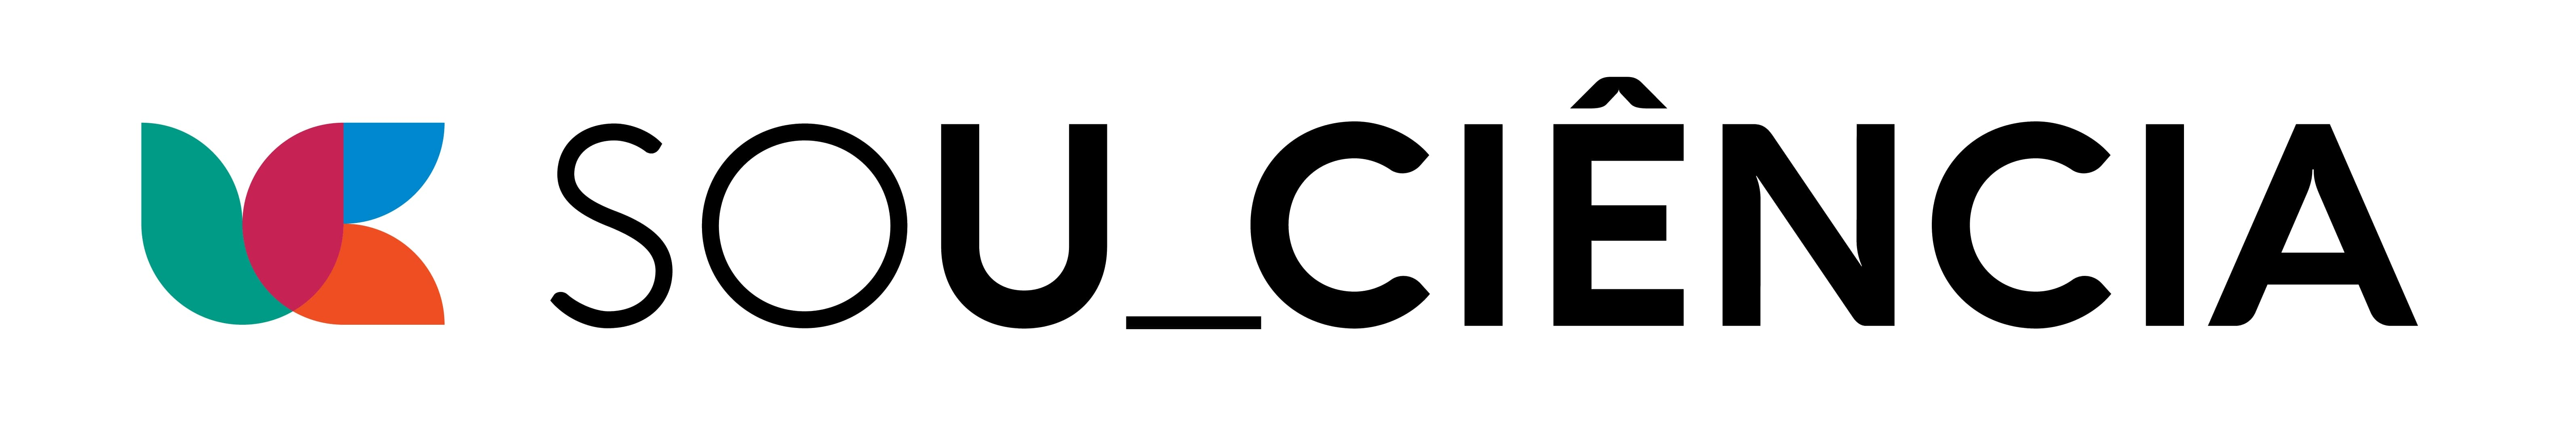

**Coordenação Geral:** \\
Soraya Soubhi Smaili (UNIFESP)

**Coordenação de Pesquisa:** \\
Maria Angélica Pedra Minhoto (UNIFESP) \\
Pedro Arantes (UNIFESP) 

**Equipe de Dados** \\

**Coordenação:** \\
Thaís Cavalcante Martins 

**Pesquisadora Colaboradora:** \\
Daniela Leal Musa (UNIFESP)

**Equipe Técnica:** 

Alexsandro Cardoso Carvalho \\
Antonio Guerreiro Silva Serrano \\
Ecila Alves de Oliveira Migliori \\
Fabiana Yumi Sato Kayanoki \\
Meyrele Torres Nascimento \\
Ricardo Ireno dos Santos \\


**Autor: Antonio Guerreiro Silva Serrano**

# Recomendações de Desempenho - R

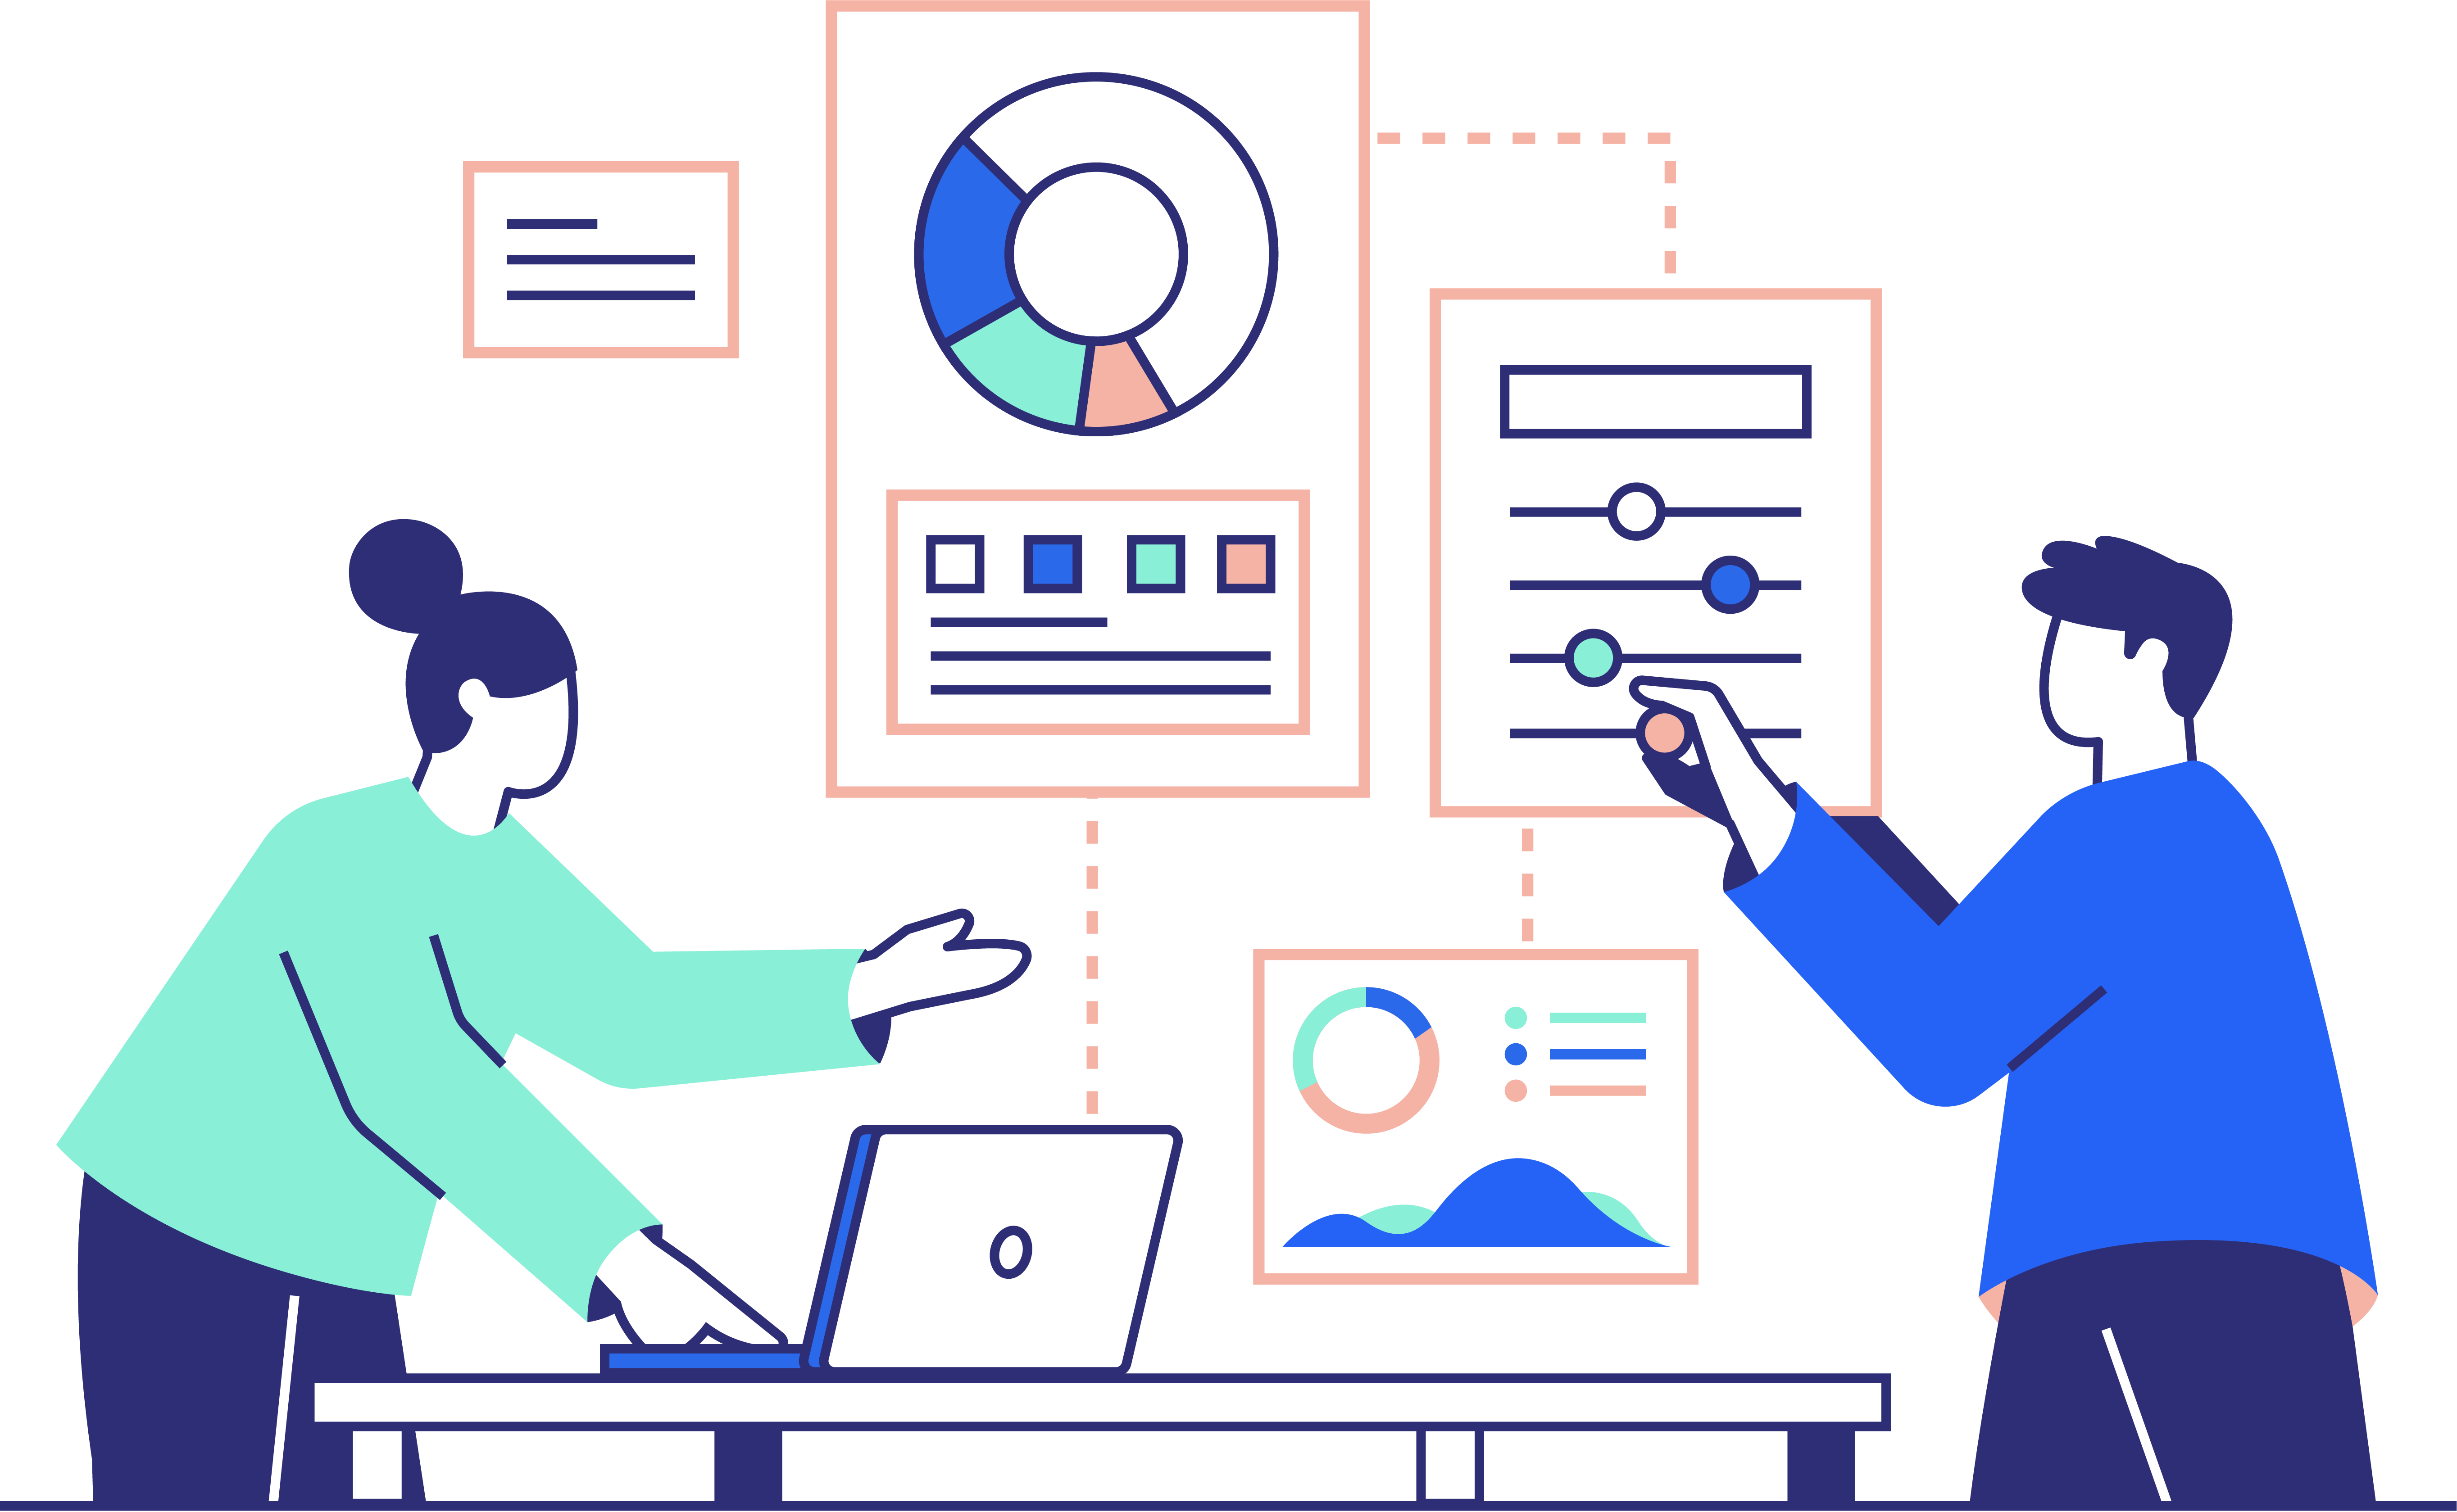

## Introdução

**Como lidar com arquivos muito grandes?**

Lidar com arquivos muito grandes, da ordem de GB, pode ser um desafio para muitos cientistas de dados, especialmente aqueles que não possuem uma máquina robusta. A análise de dados envolve a manipulação de grandes conjuntos de dados, que muitas vezes são armazenados em arquivos CSV ou outros formatos. No entanto, carregar um arquivo grande na memória pode levar a problemas de desempenho e até mesmo travamentos no computador. Além disso, alguns softwares de análise de dados podem não ser capazes de lidar com conjuntos de dados grandes o suficiente, resultando em erros ou resultados imprecisos.

Entretanto, existem diversas técnicas e soluções disponíveis para minimizar os problemas de desempenho e evitar travamentos no computador. Com a utilização de técnicas de leitura em lotes, otimização de código e serviços de processamento em nuvem, é possível realizar análises de dados complexas de forma eficiente e sem comprometer a qualidade dos resultados.



**Quais dados serão utilizados nesta demonstração?**

Nesta demonstração, utilizou-se o banco de dados do Censo da Educação Superior de Alunos do SoU_Ciência referente ao ano de 2019.

O Censo da Educação Superior de Alunos é uma pesquisa realizada pelo Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (INEP) que tem como objetivo coletar informações sobre a educação superior no Brasil. Essa pesquisa é realizada anualmente e fornece dados importantes sobre o perfil dos alunos matriculados em cursos de graduação e pós-graduação, bem como informações sobre as instituições de ensino superior em todo o país. Esses dados podem ser utilizados para diversas finalidades, como a análise do mercado de trabalho, planejamento de políticas públicas de educação e pesquisa acadêmica.

## 1. Preparando o ambiente de programação em R

**1.1 Importando as bibliotecas necessárias**

Importar bibliotecas é uma etapa fundamental nos projetos em R, pois elas fornecem funcionalidades adicionais que podem ser usadas para executar tarefas específicas. Existem muitas bibliotecas disponíveis em R para diversas finalidades, desde estatísticas descritivas até visualização de dados e machine learning.

In [72]:
## Bibliotecas R

# Verificar, instalar e importar as bibliotecas necessárias.
# Apresentar uma mensagem geral de instalação.
# Ocultar todas as mensagens de instalação ao fim do processo.

pacotes <- c(
              "readr", 
              "dplyr", 
              "tidyverse", 
              "shiny", 
              "pbapply",
              "IRdisplay",
              "data.table"
              )

suppressMessages({
  for (pacote in pacotes) {
    if (!require(pacote, character.only = TRUE, quietly = TRUE)) {
      cat("Instalando a biblioteca ", pacote, " do R ... ")
      install.packages(pacote)
      library(pacote, character.only = TRUE)
      cat("Instalada!\n")
    }
  }
})

**1.2 Download dos dados**

Em sua versão mais recente, os dados estão disponíveis no repositório  (http://  )  e estão  em formato CSV delimitados por ponto e vírgula (sep = ";") . Os arquivos encontram-se compactados (em formato .zip) e devem ser descompactados no seu disco rígido.

## 2. Carregando os dados na forma de um dataframe

**2.1 Leitura do arquivo CSV**


A leitura de arquivos CSV é uma das operações mais comuns em análise de dados e o R possui diversas funções para importar esses arquivos. Uma das mais utilizadas é a função read_csv(), que permite a leitura de arquivos CSV com valores separados por vírgula, e outros tipos de separadores também. 

In [9]:
# Leitura de arquivos no formato CSV

# Define a variável "caminho" como "./", ou seja, o diretório atual em que o notebook está sendo executado.
caminho <- "./"

# Leitura do arquivo 'trienio_2009_2010_2011.csv'
df_aluno_2019 <- read.csv(paste0(caminho, "SoU_censo_aluno_2019.csv"), sep = "|", encoding = "UTF-8", na.strings = c("NA", "N/A", "", " "))

**2.3 Ops, alguma coisa deu errado ...**

Ao tentar executar o código acima pode ocorrer o erro indicado na captura de tela abaixo. A leitura de arquivos CSV muito grandes pode ser um problema para computadores com pouca memória RAM disponível. Isso pode resultar em erros, como travamento do computador ou falha na execução do código. 

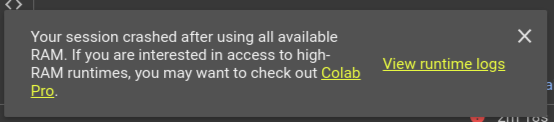

## 3. Como resolver o problema de memória RAM insuficiente?

**3.1 Aumentar a memória *swap* (swp) do computador**

Quando realizamos análises de dados em arquivos muito grandes, a leitura desses arquivos pode se tornar um desafio, pois muitas vezes não temos memória RAM suficiente para lidar com todo o conjunto de dados de uma só vez. Nesses casos, podemos recorrer à memória swap do computador, que é um espaço em disco usado para armazenar temporariamente informações da memória RAM quando esta atinge sua capacidade máxima. Ao utilizar a memória swap, podemos reduzir a pressão na memória RAM e permitir a leitura do arquivo CSV em partes menores e mais gerenciáveis. É importante lembrar que o uso da memória swap pode tornar a leitura de dados mais lenta, devido ao tempo de acesso ao disco rígido, porém, pode ser uma solução útil para lidar com arquivos muito grandes em computadores com limitações de memória RAM.

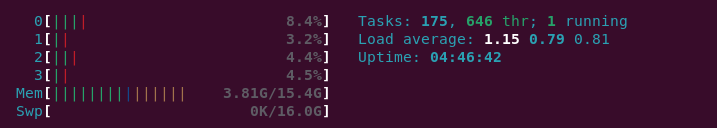

**3.2 Leitura do arquivo CSV em lotes e selecionando apenas as colunas realmente necessárias**

Uma técnica bastante útil para lidar com arquivos grandes é a leitura em blocos (ou *chunking*). Ao invés de ler o arquivo todo de uma vez, o arquivo é lido em pequenos pedaços, também conhecidos como blocos, que cabem na memória RAM disponível. Além disso, para otimizar ainda mais o uso da memória RAM, é possível selecionar apenas as colunas necessárias para a análise de dados. Dessa forma, é possível processar grandes conjuntos de dados sem sobrecarregar a memória RAM, garantindo uma leitura e análise mais eficientes.

### R

**3. Selecionar as n primeiras colunas**

Remoção de colunas desnecessárias para reduzir o tamanho do arquivo e, consequentemente, a quantidade de memória necessária RAM para sua leitura.

In [17]:
# Obter o diretório de trabalho atual
caminho <- getwd()

# definir o caminho e nome do arquivo csv
nome_arquivo <- 'SoU_censo_aluno_2019.csv'
txt <- file.path(caminho, nome_arquivo)

# definir o número máximo de colunas
n <- 20

# ler o arquivo csv
df_aluno_2019 <- read.table(txt, header = TRUE, colClasses = rep("character", n), 
                            sep = "|", quote = "", comment.char = "", fileEncoding = "UTF-8")

**3.2 Selecionar as colunas baseado numa lista**

Leitura apenas das colunas realmente necessárias, visando reduzir o tamanho do arquivo e, consequentemente, a quantidade de memória necessária RAM para sua leitura.

In [ ]:
# Definir as colunas a serem selecionadas (<=30)

cols <- c('NU_ANO_CENSO', 'TP_CATEGORIA_ADMINISTRATIVA', 'TP_ORGANIZACAO_ACADEMICA', 'CO_CURSO', 'CO_CURSO_POLO', 
          'TP_TURNO', 'TP_GRAU_ACADEMICO', 'TP_MODALIDADE_ENSINO', 'TP_NIVEL_ACADEMICO', 'CO_CINE_ROTULO', 
          'IN_APOIO_TRANSPORTE', 'IN_ATIVIDADE_EXTRACURRICULAR', 'IN_COMPLEMENTAR_ESTAGIO', 'IN_COMPLEMENTAR_EXTENSAO', 
          'IN_COMPLEMENTAR_MONITORIA', 'IN_COMPLEMENTAR_PESQUISA', 'IN_BOLSA_ESTAGIO', 'IN_BOLSA_EXTENSAO', 
          'IN_BOLSA_MONITORIA', 'IN_BOLSA_PESQUISA')

# Obter o diretório de trabalho atual
caminho <- getwd()

# Definir o caminho e nome do arquivo CSV
nome_arquivo <- 'SoU_censo_aluno_2019.csv'
txt <- file.path(caminho, nome_arquivo)

# Definir as colunas a serem selecionadas
cols <- c("NU_ANO_CENSO", "NO_ORGANIZACAO_ACADEMICA", "QT_INSCRITO_TOTAL")

# Ler o arquivo CSV
df_aluno_2019 <- fread(txt, select = cols, sep = "|", encoding = "UTF-8")

**3.3 Selecionar as n primeiras colunas e leitura de arquivo CSV por lotes**

O código a seguir realiza a leitura de um arquivo CSV em blocos (chunks) e combina os dados em um único dataframe. Primeiro, ele obtém o diretório de trabalho atual e define o caminho e o nome do arquivo CSV a ser lido. Em seguida, define o número de colunas a serem selecionadas e o tamanho de cada bloco de dados a ser lido. Um dataframe vazio é inicializado. O caminho do arquivo é impresso usando a função cat. A leitura do arquivo é feita em blocos, usando a função read.csv com parâmetros como o separador "|", o número de linhas por bloco e as classes das colunas definidas como "character". Os blocos são armazenados em uma lista. Por fim, os blocos são combinados em um único dataframe usando a função do.call(rbind, chunks). O nome do dataframe final é atribuído a uma variável externa e uma mensagem amigável é exibida indicando o término da leitura dos blocos e o número de linhas do dataframe resultante.

In [ ]:
# Obter o diretório de trabalho atual
caminho <- getwd()

# Definir o caminho e nome do arquivo CSV
nome_arquivo <- "SoU_censo_aluno_2019.csv"
txt <- file.path(caminho, nome_arquivo)

# Definir o número de colunas para selecionar
n <- 30 

# Definir o tamanho do chunk
chunksize <- 500000

# Iniciar um dataframe vazio
df <- data.frame()

# Logar com estilo usando cat
cat(paste0("Caminho do arquivo: ", txt, "\n"))

# Ler o arquivo CSV em chunks
chunks <- lapply(seq(1, length, chunksize), function(start) {
  end <- min(start + chunksize - 1, length)
  chunk <- read.csv(txt, sep = "|", nrows = end - start + 1, skip = start - 1, header = FALSE,
                    colClasses = rep("character", n))
  chunk
})

# Combinar os chunks em um único dataframe
df <- do.call(rbind, chunks)

# Atribuir o nome do dataframe final como uma variável externa
nome <- "alunos_2019"
assign(paste0("df_", nome), df, envir = .GlobalEnv)

# Finalmente, informar com uma mensagem amigável
cat("\nFim da leitura dos chunks...\n")
cat(paste0("Número de linhas do dataframe: ", nrow(df), "\n"))

**3.4 Selecionar baseado numa lista de colunas e leitura de arquivo CSV por lotes**

O código a seguir realiza a leitura de um arquivo CSV em blocos (chunks) e combina os dados em um único dataframe, selecionando apenas as colunas especificadas. Primeiramente, é definida uma lista cols que contém as colunas a serem selecionadas. Em seguida, o código obtém o diretório de trabalho atual e define o caminho e o nome do arquivo CSV a ser lido. Uma mensagem estilizada é exibida com o caminho do arquivo em vermelho. O código calcula o total de linhas do arquivo CSV utilizando o comando do sistema wc -l e converte o resultado para um valor numérico. O total de linhas é exibido em verde. O tamanho de cada bloco (chunk) é definido como 500.000 linhas. O arquivo CSV é lido em blocos utilizando a função fread do pacote data.table, especificando o separador "|", o número de linhas por bloco, o deslocamento (skip), a lista de colunas a serem selecionadas, entre outros parâmetros. Os blocos são combinados em um único dataframe usando a função rbindlist. O nome do dataframe final é atribuído a uma variável externa e o número de linhas do dataframe é obtido. Por fim, é exibida uma mensagem amigável indicando o fim da leitura dos blocos e o número de linhas do dataframe resultante, em cores diferentes para destacar as informações.

In [ ]:
# definir as colunas a serem selecionadas (<=30)

cols <- c('NU_ANO_CENSO', 'TP_CATEGORIA_ADMINISTRATIVA', 'TP_ORGANIZACAO_ACADEMICA', 
          'CO_CURSO', 'CO_CURSO_POLO', 'TP_TURNO', 'TP_GRAU_ACADEMICO', 'TP_MODALIDADE_ENSINO', 
          'TP_NIVEL_ACADEMICO', 'CO_CINE_ROTULO', 'IN_APOIO_TRANSPORTE', 
          'IN_ATIVIDADE_EXTRACURRICULAR', 'IN_COMPLEMENTAR_ESTAGIO', 'IN_COMPLEMENTAR_EXTENSAO',
          'IN_COMPLEMENTAR_MONITORIA', 'IN_COMPLEMENTAR_PESQUISA', 'IN_BOLSA_ESTAGIO', 
          'IN_BOLSA_EXTENSAO', 'IN_BOLSA_MONITORIA', 'IN_BOLSA_PESQUISA', 
          'TP_ESCOLA_CONCLUSAO_ENS_MEDIO', 'IN_ALUNO_PARFOR',
          'TP_SEMESTRE_CONCLUSAO', 'TP_SEMESTRE_REFERENCIA')

# Obter o diretório de trabalho atual
caminho <- getwd()

# Definir o caminho e nome do arquivo CSV
nome_arquivo <- "SoU_censo_aluno_2019.csv"
txt <- file.path(caminho, nome_arquivo)

# Logar com estilo usando cat
cat("\033[1;31mCaminho do arquivo:\033[0m", txt, "\n")

# Calcular o total de linhas do arquivo
length <- system(paste0("wc -l <", txt), intern = TRUE)[1]
length <- as.numeric(strsplit(length, "\\s+")[[1]][1])

# Exibir o total de linhas do arquivo CSV
cat("\033[1;32mTotal de linhas do arquivo CSV:\033[0m", length, "\n")

# Definir o tamanho do chunk
chunksize <- 500000

# Ler o arquivo CSV em chunks
df <- data.table()
for (i in seq(1, length, by = chunksize)) {
  chunk <- fread(txt, sep = "|", nrows = chunksize, skip = i - 1, select = cols, drop = NULL, encoding = "UTF-8", header = TRUE)
  df <- rbindlist(list(df, chunk))
}

# Atribuir o nome do dataframe final como uma variável externa
nome <- "alunos_2019"
assign(paste0("df_", nome), df, envir = .GlobalEnv)

# Obter o número de linhas do dataframe final
num_linhas <- nrow(get(paste0("df_", nome)))

# Imprimir uma mensagem amigável
cat("\033[1;31m\nFim da leitura dos chunks...\033[0m\n")
cat("\033[1;32mNúmero de linhas do dataframe:\033[0m", num_linhas, "\n")

**3.10 Selecionar todas as colunas e leitura de arquivo CSV por lotes**

O código a seguir realiza a leitura de um arquivo CSV em blocos (chunks) e combina os dados em um único dataframe. Primeiramente, é obtido o diretório de trabalho atual. Em seguida, é definido o caminho e o nome do arquivo CSV a ser lido. O tamanho de cada bloco (chunk) é definido como 500.000 linhas. Um dataframe vazio é inicializado. O código calcula o total de linhas do arquivo utilizando a função length em conjunto com readLines. O número total de chunks é calculado dividindo o total de linhas pelo tamanho do chunk e arredondando para cima. Uma mensagem é impressa para indicar que a leitura do arquivo CSV está em andamento. A leitura é realizada em um loop, onde cada chunk é lido do arquivo usando a função fread do pacote data.table, especificando o separador "|", o cabeçalho, o deslocamento (skip) e o número de linhas a serem lidas. Cada chunk é adicionado ao dataframe usando a função rbindlist. O nome do dataframe final é atribuído a uma variável externa. Após a conclusão da leitura, uma mensagem é exibida indicando que a leitura do arquivo CSV foi concluída, seguida pelo número de linhas do dataframe resultante.

In [ ]:
# Obter o diretório de trabalho atual
caminho <- getwd()

# Definir o caminho e nome do arquivo CSV
nome_arquivo <- "SoU_censo_aluno_2019.csv"
txt <- file.path(caminho, nome_arquivo)

# Definir o tamanho do chunk
chunksize <- 500000

# Iniciar um dataframe vazio
df <- data.table()

# Calcular o total de linhas do arquivo
length <- length(readLines(txt))

# Calcular o número total de chunks
total_chunks <- ceiling(length / chunksize)

# Imprimir mensagem indicando que a leitura está ocorrendo
cat("\nA leitura do arquivo CSV está em andamento...\n")

# Ler o arquivo CSV em chunks
for (i in 1:total_chunks) {
  # Calcular o início e fim do chunk atual
  start <- (i - 1) * chunksize + 1
  end <- min(length, i * chunksize)

  # Ler o chunk atual do arquivo CSV
  chunk <- fread(txt, sep = "|", header = TRUE, skip = start - 1, nrows = end - start + 1)

  # Adicionar o chunk ao dataframe
  df <- rbindlist(list(df, chunk), fill = TRUE)
}

# Atribuir o nome do dataframe final como uma variável externa
nome <- "alunos_2019"
assign(paste0("df_", nome), df)

# Imprimir mensagem indicando que a leitura foi concluída
cat("\nLeitura do arquivo CSV concluída.\n")
cat(paste0("Número de linhas do dataframe: ", nrow(df), "\n"))

#Contato

Agradecemos todas as críticas e sugestões recebidas de pesquisadores e usuários que estão colaborando para a melhoria na qualidade da prestação das informações. 
Qualquer sugestão ou dúvida pode ser encaminhada para o e-mail <souciencia@unifesp.br>. 

# Obrigado

A equipe de Dados do SoU_Ciência elaborou este tutorial para auxiliar a todos os interessados em trabalhar com os nossos bancos de dados a terem um primeiro contato com o mundo das linguagens de programação. Contudo, para os mais experientes, este material ainda constitui um ótimo guia rápido de acesso à informação para o dia a dia, agilizando a rotina de trabalho dos Cientistas de Dados.

O SoU_Ciência deseja todo o sucesso em sua pesquisa e conte conosco ao longo desta incrível jornada.

In [ ]:
#@title
display_html("<marquee style='width: 60%;'>
                 <b style='font-size: 30px;'>Sucesso!!!!</b>
              </marquee>")

Sucesso!!!!

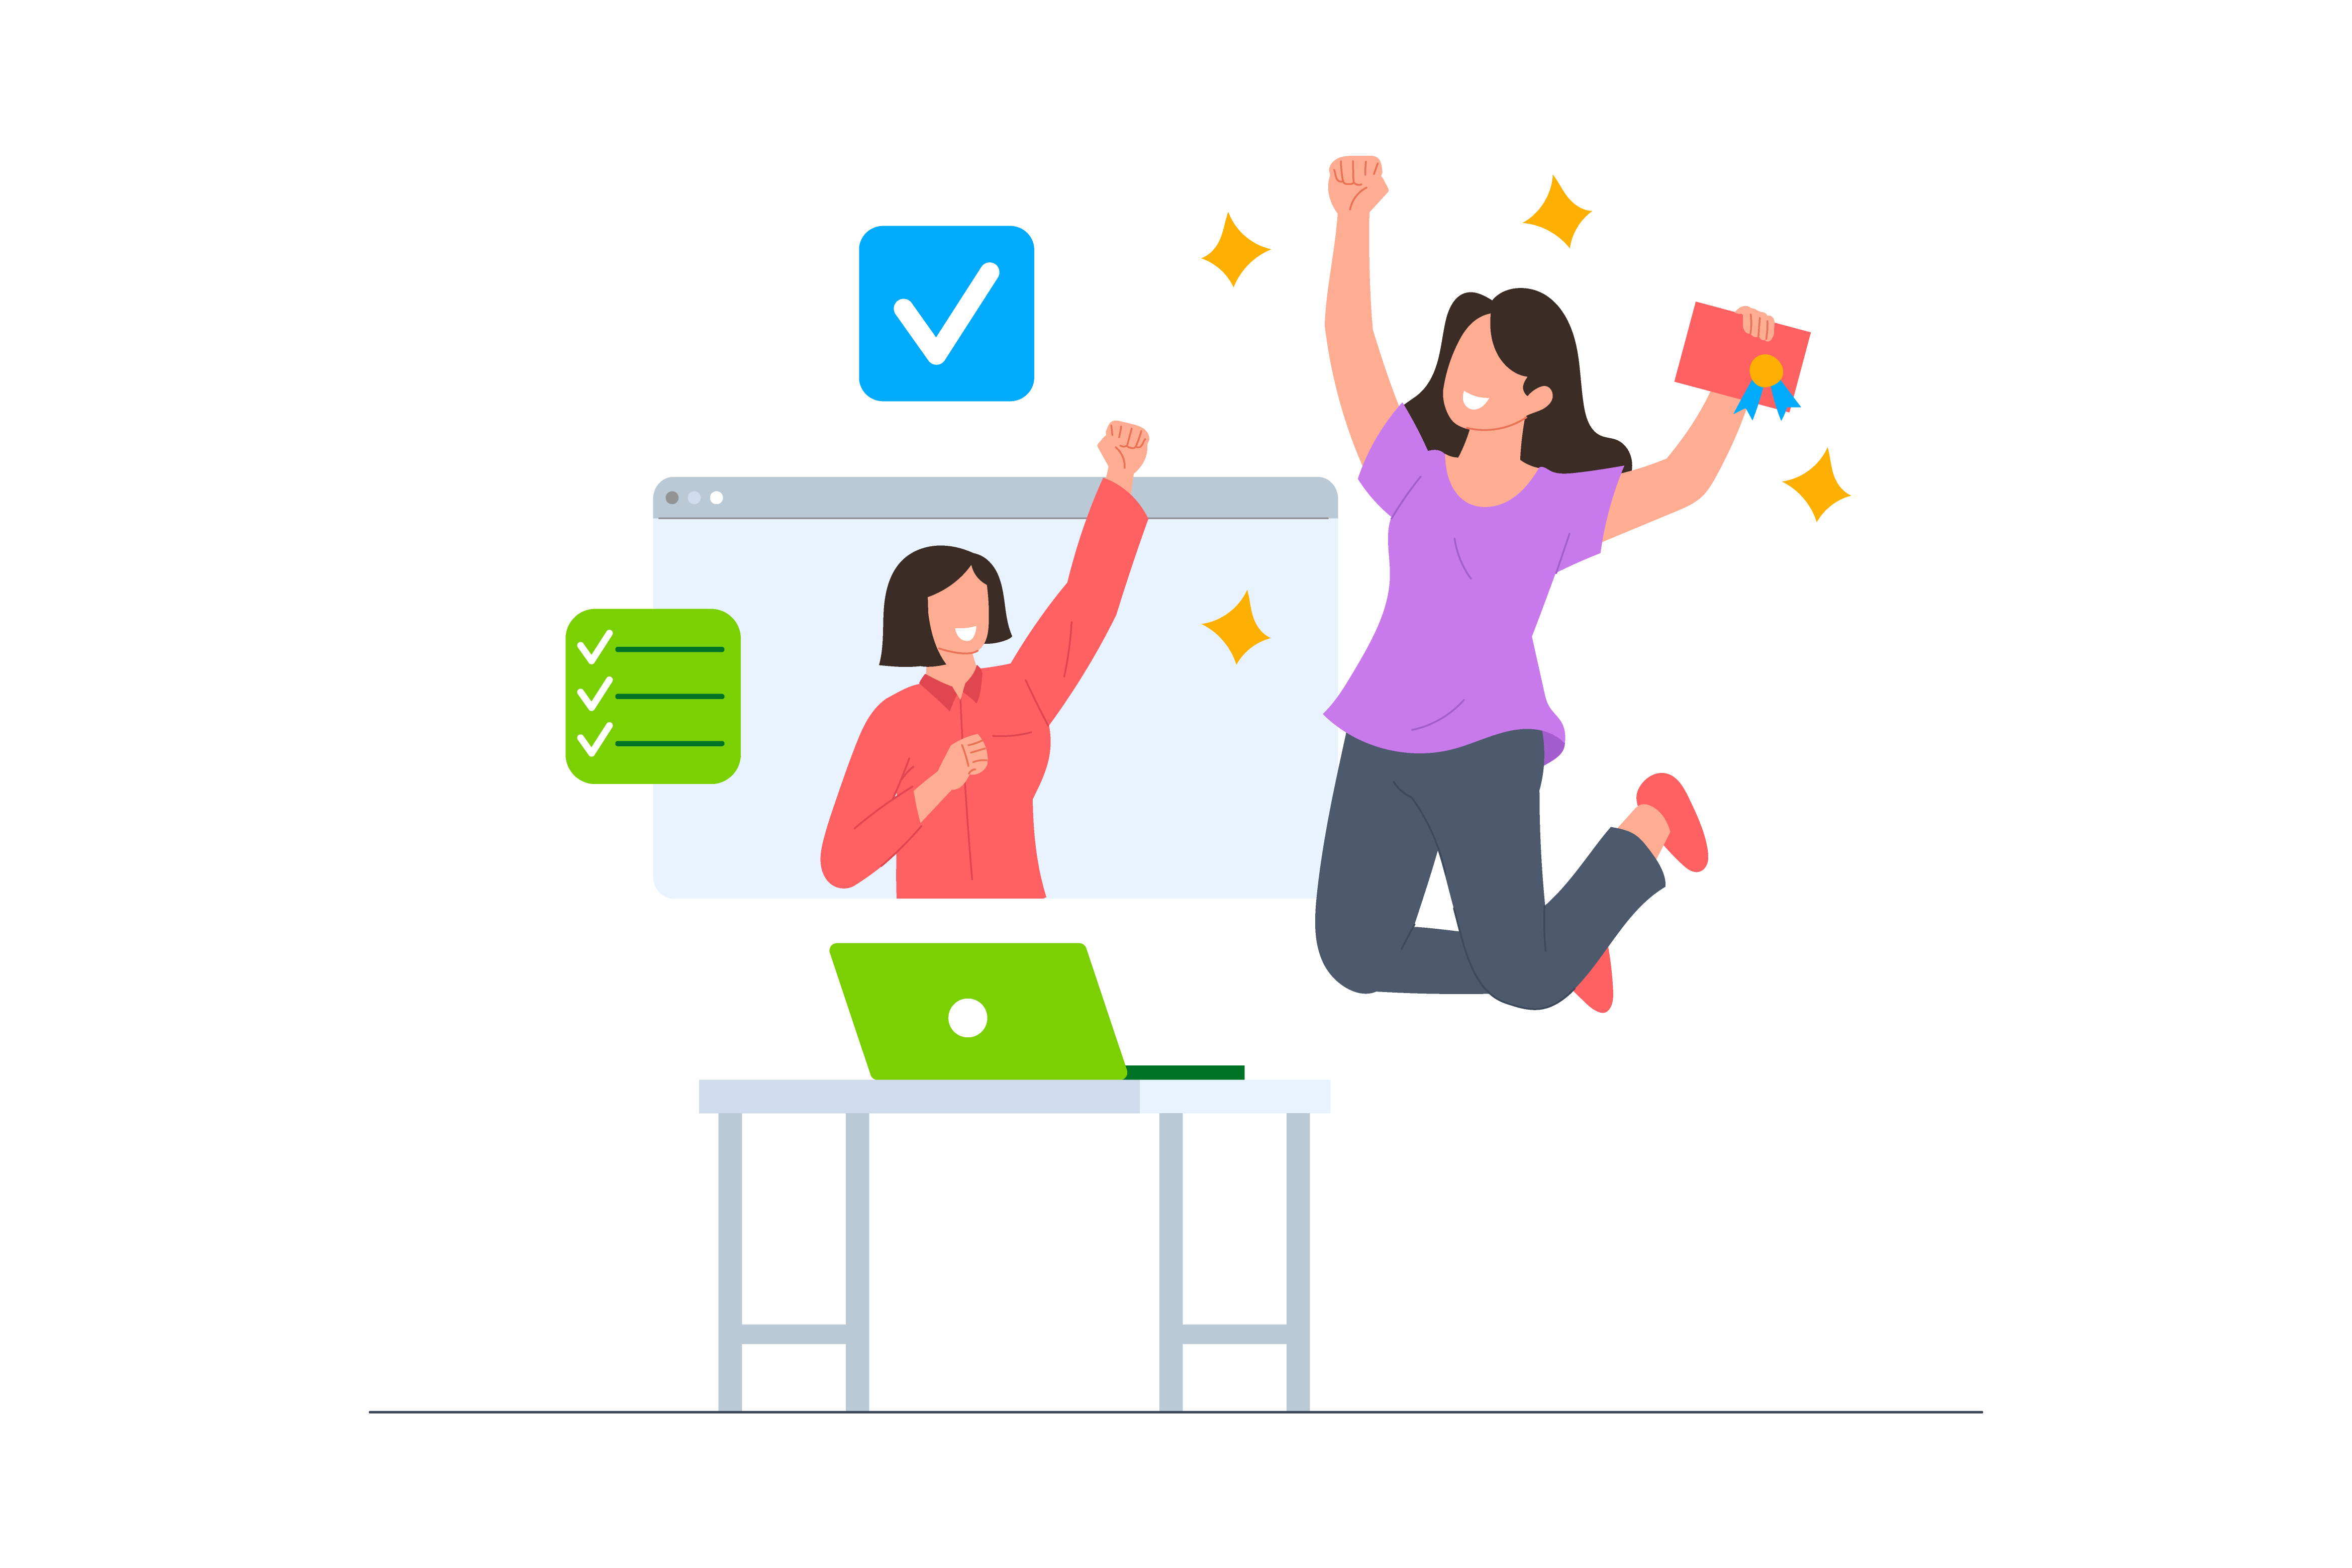